<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##CS6271 - Evolutionary Agorithms and Humanoid Robotics 
###GRAPE code running classification problems


Leader: Conor Ryan

Developer: Allan De Lima

Tester: Enrique Naredo

## GRAPE from GitHub Repository


<div>
<img src="https://drive.google.com//uc?export=view&id=1ajCLGItBaWZIy2Ha-RqJp-S_weIxMQ5U" width="150"/>
</div> 
GRammatical Algorithms in Python for Evolution (GRAPE)


In [ ]:
## mount your Google drive
# 1) click on the link
# 2) sign in
# 3) copy the provided code
# 4) paste it in the text box bellow
# 5) click the folder icon at the right
# 6) verify your drive is mounted

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Clone this repository in which we have all functions and classes created or adapted to this work.

In [ ]:
import os.path
# Get the library from our BDS research Group
# copy the path from your drive
PATH = '/content/drive/MyDrive/grape/'

# check if 'grape' already exists
if os.path.exists(PATH):
    print('grape directory already exists')
else:
    %cd /content/drive/MyDrive/
    !git clone https://github.com/UL-BDS/grape.git 
    print('Cloning grape in your Drive')

# change directory to 'grape'
%cd /content/drive/MyDrive/grape/

/content/drive/MyDrive
Cloning into 'grape'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 50 (delta 16), reused 46 (delta 15), pack-reused 0
Unpacking objects: 100% (50/50), done.
Cloning grape in your Drive
/content/drive/MyDrive/grape


Import adapted functions and classes from PonyGE2.

Import our algorithms, adapted from deap.algorithms.

Import DEAP (maybe it can be necessary to run the installation before that).

Import functions used by our grammars.



In [ ]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install deap==1.3 

from ponyge2_adapted_files import Grammar, ge
import algorithms
from functions import add, sub, mul, pdiv, neg, and_, or_, not_, less_than_or_equal, greater_than_or_equal

from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from deap import creator, base, tools

from sklearn.model_selection import train_test_split

     |████████████████████████████████| 152 kB 5.1 MB/s 


## Choose a Problem

Set a problem to solve, you can choose:
* 'spambase' 
* 'heartDisease'.

In [ ]:
# choose a problem to solve
# 'spambase' or 'heartDisease'
problem = 'heartDisease'

Read datasets and grammars according to the problem picked in the previous cell.

In [ ]:
# -------------- SPAMBASE ------------------
if problem == 'spambase':

    # data features
    X = np.zeros([4601, 57], dtype=float)
    data = pd.read_table(r"datasets/spambase.csv")
    for i in range(4601):
        for j in range(57):
            X[i,j] = data['d'+ str(j)].iloc[i]

    # class labels
    Y = np.zeros([4601,], dtype=int)
    for i in range(4601):
        Y[i] = data['class'].iloc[i]

    # split data into train-test, test_size=0.3-> 30% test, 70% training  
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)    
 
    X_train = np.transpose(X_train)
    X_test = np.transpose(X_test)

    # grammar       
    GRAMMAR_FILE = 'spambase.bnf'

# ---------------- HEARTDISEASE ------------------
elif problem == 'heartDisease':
    data =  pd.read_csv(r"datasets/processed.cleveland.data", sep=",")

    # preprocessing
    # remove registers (rows) with missing information
    # happens in columns d11 and d12
    data = data[data.ca != '?']
    data = data[data.thal != '?']

    # class labels
    Y = data['class'].to_numpy()

    # drop the column 'class'
    data = data.drop(['class'], axis=1)        
        
    # normalising numeric data    
    features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

    data.loc[:, features] = (data.loc[:, features] - data.loc[:, features].mean())/data.loc[:, features].std()
    
    # Using oneHot enconding (pandas) on categorical (non binary) features
    # https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
    data = pd.get_dummies(data, columns=['cp', 'restecg', 'slope', 'ca', 'thal'])
    
    # data features
    X = data.to_numpy()

    # this is a multiclass problem: 5 classes with 297 samples in total
    # class0=160, class1=54, class2=35, class3=35, class4=13
    # we convert it into a binary classification problem: classA, classB
    # consider each class at the time using one-vs-all
    # classA using label 0 and the remaining classB using 1
    for i in range(len(Y)):
        #Y[i] = 1 if Y[i] > 0 else 0
        Y[i] = 0 if Y[i] <= 0 else 1

    # split data into train-test, test_size=0.3-> 30% test, 70% training
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    X_train = np.transpose(X_train)
    X_test = np.transpose(X_test)       

    # grammar      
    GRAMMAR_FILE = 'heartDisease2.bnf'

In [ ]:
 print('Training (X,Y):\t', X_train.shape, Y_train.shape)
 print('Test (X,Y):\t', X_test.shape, Y_test.shape)

Training (X,Y):	 (25, 207) (207,)
Test (X,Y):	 (25, 90) (90,)


## Heart Disease Dataset

###Preprocessing the heart disease dataset

- Remove rows with missing data
- Consider all unhealthy classes as '1'
- Normalise numeric data
- Use One-Hot encoding in non-binary categorical data




###Attribute information about the heart disease dataset

Numeric attributes:
- age: age in years
- trestbps: esting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- thalach: maximum heart rate achieved 
- oldpeak: ST depression induced by exercise relative to rest

Boolean attributes:
- sex: (1 = male; 0 = female)
- fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)       
- exang: exercise induced angina (1 = yes; 0 = no)    

Categorical (non binary) attributes:
- cp: chest pain type
 - Value 1: typical angina
 - Value 2: atypical angina
 - Value 3: non-anginal pain
 - Value 4: asymptomatic        
- restecg: resting electrocardiographic results
 - Value 0: normal
 - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria   
- slope: the slope of the peak exercise ST segment
 - Value 1: upsloping
 - Value 2: flat
 - Value 3: downsloping     
 
- ca: number of major vessels (0-3) colored by flourosopy        
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect      


The predicted attribute: diagnosis of heart disease (angiographic disease tatus)
- Value 0: < 50% diameter narrowing
- Value 1: > 50% diameter narrowing

Print data.

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 10000)
pd.set_option('display.colheader_justify', 'center')

data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,0.934603,1.0,0.749116,-0.275978,1.0,0.017465,0.0,1.067164,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
1,1.376605,1.0,1.593577,0.743301,0.0,-1.813274,1.0,0.381130,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0
2,1.376605,1.0,-0.658320,-0.352904,0.0,-0.897904,1.0,1.324427,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,-1.938409,1.0,-0.095345,0.050961,0.0,1.630258,0.0,2.096215,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0
4,-1.496407,0.0,-0.095345,-0.833696,0.0,0.976423,0.0,0.295376,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0


## GE Parameters

**Print grammar**

In [ ]:
f = open("grammars/" + GRAMMAR_FILE, "r")
print(f.read())
f.close() 

<log_op> ::= <conditional_branches> | and_(<log_op>,<log_op>) | or_(<log_op>,<log_op>) | not_(<log_op>) | <boolean_feature>
<conditional_branches> ::= less_than_or_equal(<num_op>,<num_op>) | greater_than_or_equal(<num_op>, <num_op>)
<num_op>   ::= <num_op>+<num_op> | <num_op>-<num_op> | <num_op>*<num_op> | pdiv(<num_op>,<num_op>) | <nonboolean_feature>
<boolean_feature> ::= x[1]|x[4]|x[6]|x[8]|x[9]|x[10]|x[11]|x[12]|x[13]|x[14]|x[15]|x[16]|x[17]|x[18]|x[19]|x[20]|x[21]|x[22]|x[23]|x[24]
<nonboolean_feature> ::= x[0]|x[2]|x[3]|x[5]|x[7]|<c><c>.<c><c>
<c>  ::= 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9



Set up the grammar addressed by GRAMMAR_FILE in the class Grammar.

In [ ]:
BNF_GRAMMAR = Grammar(path.join("grammars", GRAMMAR_FILE))

Define as fitness function the number of outputs wrongly predicted.

In [ ]:
def fitness_eval(individual, points):
    """
    Fitness Fucntion
    """

    x = points[0]
    Y = points[1]
    
    if individual.invalid == True:
        return np.NaN,

    # Evaluate the expression
    try:
        pred = eval(individual.phenotype)
    except (FloatingPointError, ZeroDivisionError, OverflowError,
            MemoryError):
        # FP err can happen through eg overflow (lots of pow/exp calls)
        # ZeroDiv can happen when using unprotected operators
        return np.NaN,
    assert np.isrealobj(pred)
    
    try:
        Y_class = [1 if pred[i] > 0 else 0 for i in range(len(Y))]
    except (IndexError, TypeError):
        return np.NaN,

    compare = np.equal(Y,Y_class)
    fitness = 1 - np.mean(compare)
   
    return fitness,

Create a deap toolbox.

Use negative weights in the `base.Fitness` since we are trying to minimise the fitness.

`ge.Individual` is a class with the following attributes: `phenotype`, `genome`, `tree`, `nodes`, `invalid` (True or False), `depth` and `used_codons`.

Usually, when using deap, we initialise each individual independently, and then we repeat that until we fill out the whole population. However, since we are using Position Independent Grow Initialisation, we need to initialise all individuals simultaneously.

`ge.selTournament` prevents selecting invalid individuals.

`ge.crossover_onepoint` selects crossover points within the used portion of the genome. 

Similarly, `ge.mutation_int_flip_per_codon` performs only over the effective length.



In [ ]:
# create a toolbox for DEAP
toolbox = base.Toolbox()

# define a single objective, minimising fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

creator.create('Individual', ge.Individual, fitness=creator.FitnessMin)

toolbox.register("populationCreator", ge.initialisation_PI_Grow, creator.Individual) 

toolbox.register("evaluate", fitness_eval)

# Tournament selection:
toolbox.register("select", ge.selTournament, tournsize=7)

# Single-point crossover:
toolbox.register("mate", ge.crossover_onepoint)

# Flip-int mutation:
toolbox.register("mutate", ge.mutation_int_flip_per_codon)


Set the main function and run it.

Set the statistics object regarding the fitness score, but there are other statistics defined internally.

Perform Grammatical Evolution using `algorithms.ge_eaSimple`, a simple evolutionary algorithm. The differences to the `algorithms.eaSimple` used by deap are:

*   We use elitism;
*   After crossover and mutation, we check the offspring to assure that the max tree depth is not achieved;
*   We measure the generation and the selection times;
*   We count the number of invalid individuals.

## Run GE

Set our Grammatical Evolution parameters.

In [ ]:
## GE parameters
# start with 100 just to test annd increase later say to 1000
POPULATION_SIZE = 1000
# start with 20 just to test annd increase later say to 200
MAX_GENERATIONS = 200
P_CROSSOVER = 0.8
P_MUTATION = 0.01
ELITE_SIZE = round(0.01*POPULATION_SIZE)
HALL_OF_FAME_SIZE = 1
MAX_INIT_TREE_DEPTH = 10
MIN_INIT_TREE_DEPTH = 2
MAX_TREE_DEPTH = 17
MAX_WRAPS = 0
CODON_SIZE = 255

In [ ]:
# create initial population (generation 0):
population = toolbox.populationCreator(size=POPULATION_SIZE, 
              bnf_grammar=BNF_GRAMMAR, 
              min_init_tree_depth=MIN_INIT_TREE_DEPTH,
              max_init_tree_depth=MAX_INIT_TREE_DEPTH,
              max_tree_depth=MAX_TREE_DEPTH, 
              max_wraps=MAX_WRAPS,
              codon_size=CODON_SIZE
              )

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# prepare the statistics object:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.nanmean)
stats.register("std", np.nanstd)
stats.register("min", np.nanmin)
stats.register("max", np.nanmax)



In [ ]:
# run Grammatical Evolution
# using your parameters
population, logbook = algorithms.ge_eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                      ngen=MAX_GENERATIONS, elite_size=ELITE_SIZE,
                      bnf_grammar=BNF_GRAMMAR, codon_size=CODON_SIZE, 
                      max_tree_depth=MAX_TREE_DEPTH, max_wraps=MAX_WRAPS,
                      points_train=[X_train, Y_train], 
                      points_test=[X_test, Y_test], 
                      stats=stats, halloffame=hof, verbose=True
                      )

gen	invalid	avg     	std     	min     	max     	fitness_test	best_ind_length	avg_length	max_length	selection_time	generation_time
0  	0      	0.497169	0.100067	0.231884	0.768116	0.311111    	4              	45.493    	271       	0             	0.437045       
1  	513    	0.419556	0.130258	0.231884	0.768116	0.311111    	4              	26.034    	252       	0.0174406     	1.20654        
2  	124    	0.335881	0.120447	0.231884	0.768116	0.311111    	4              	14.139    	192       	0.0135834     	0.300538       
3  	82     	0.35733 	0.169521	0.231884	0.768116	0.311111    	4              	13.721    	149       	0.0145032     	0.351682       
4  	129    	0.339423	0.169967	0.231884	0.768116	0.311111    	4              	13.552    	150       	0.0149844     	0.398919       
5  	85     	0.328297	0.171029	0.231884	0.768116	0.311111    	4              	13.978    	151       	0.0137596     	0.423746       
6  	76     	0.316331	0.161365	0.231884	0.768116	0.311111    	4              	15.527    	15

## Statistics

Extract statistics and build a beautiful table.

In [ ]:
# create statistics
max_fitness_values, mean_fitness_values = logbook.select("max", "avg")
min_fitness_values, std_fitness_values = logbook.select("min", "std")
fitness_test = logbook.select("fitness_test")
best_ind_length = logbook.select("best_ind_length")
avg_length = logbook.select("avg_length")
max_length = logbook.select("max_length")
selection_time = logbook.select("selection_time")
generation_time = logbook.select("generation_time")
gen, invalid = logbook.select("gen", "invalid")

# header for the report
header = ['gen', 'invalid', 'avg', 'std', 'min', 'max', 'fitness_test', 'best_ind_length', 'avg_length', 'max_length', 'selection_time', 'generation_time']

# results
results = pd.DataFrame(list(zip(gen, invalid, mean_fitness_values, std_fitness_values, min_fitness_values, max_fitness_values, fitness_test, best_ind_length, avg_length, max_length, selection_time, generation_time)),
               columns = header)

# options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 10000)
pd.set_option('display.colheader_justify', 'center')

# show results
display(results)

**Show the best individual as an expression.**

In [ ]:
# Best individual
import textwrap
best = hof.items[0].phenotype
print("Best individual: \n","\n".join(textwrap.wrap(best,80)))
print("\nTraining Fitness: ", hof.items[0].fitness.values[0])
print("Test Fitness: ", fitness_eval(hof.items[0], [X_test,Y_test])[0])
print("Depth: ", hof.items[0].depth)
print("Length of the genome: ", len(hof.items[0].genome))
print(f'Used portion of the genome: {hof.items[0].used_codons/len(hof.items[0].genome):.2f}')

Best individual: 
 not_(and_(or_(and_(and_(x[18],not_(x[11])),or_(and_(x[18],not_(x[17])),not_(x[4]
))),or_(not_(x[11]),and_(not_(or_(x[17],not_(x[11]))),and_(not_(x[4]),or_(not_(x
[14]),or_(not_(x[11]),and_(not_(x[24]),x[18]))))))),and_(or_(not_(x[9]),not_(x[2
4])),or_(and_(or_(not_(x[11]),or_(not_(x[19]),not_(x[24]))),and_(or_(not_(x[20])
,and_(not_(or_(x[17],not_(x[11]))),and_(not_(x[24]),x[18]))),and_(or_(not_(x[9])
,not_(x[24])),or_(not_(or_(not_(x[11]),not_(x[17]))),or_(not_(x[16]),x[18]))))),
and_(and_(not_(x[6]),not_(x[24])),or_(not_(or_(or_(x[11],not_(x[21])),or_(not_(x
[17]),not_(and_(and_(and_(x[11],not_(x[15])),or_(not_(x[16]),x[18])),x[9]))))),n
ot_(x[9])))))))

Training Fitness:  0.12077294685990336
Test Fitness:  0.21111111111111114
Depth:  17
Length of the genome:  203
Used portion of the genome: 0.76


## Plots

Plot graph regarding the best individual in each generations considering the training set and the test set.

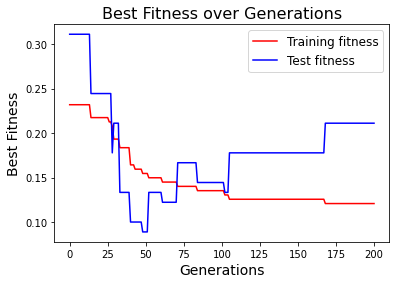

In [ ]:
plt.plot(gen, min_fitness_values, color='red', label="Training fitness")
plt.plot(gen, fitness_test, color='blue', label="Test fitness")
plt.legend(fontsize=12)
plt.xlabel('Generations', fontsize=14)
plt.ylabel('Best Fitness', fontsize=14)
plt.title('Best Fitness over Generations', fontsize=16)
plt.show()


Plot graph regarding the average fitness in each generation considering the training set.

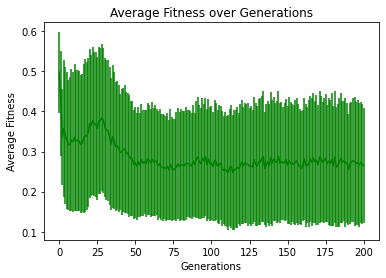

In [ ]:
plt.xlabel('Generations')
plt.ylabel('Average Fitness')
plt.title('Average Fitness over Generations')
plt.errorbar(gen, mean_fitness_values, yerr=std_fitness_values,label="Best", color="Green")
plt.show()

Plot graphs regarding the length of the genome: the maximum value, the average of the population and that one of the best individual.


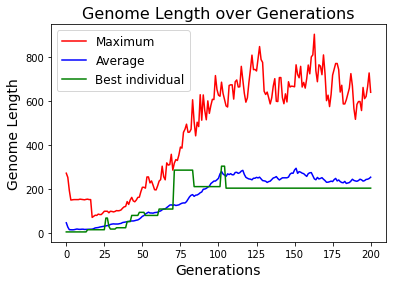

In [ ]:
plt.plot(gen, max_length, color='red', label="Maximum")
plt.plot(gen, avg_length, color='blue', label="Average")
plt.plot(gen, best_ind_length, color='green', label="Best individual")
plt.legend(fontsize=12)
plt.xlabel('Generations', fontsize=14)
plt.ylabel('Genome Length', fontsize=14)
plt.title('Genome Length over Generations', fontsize=16)
plt.show()